# Financial Transaction Fraud Detection

Data Decription
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

good notebook on other notebooks
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/discussion/277570?sort=votes

https://app.datacamp.com/learn/courses/credit-risk-modeling-in-python

https://corporatefinanceinstitute.com/resources/knowledge/finance/credit-risk/

https://www.coursera.org/learn/credit-risk-management#syllabus



https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0118432

# a. Recourses

####  The practical handbook on Machine Learning for Credit Card Fraud Detection
[transaction_Fraud_detection_handbook](https://fraud-detection-handbook.github.io/fraud-detection-handbook/Chapter_2_Background/Introduction.html)

#### A Series of kaggle notebooks can be found in the following link
[kaggle_link](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?sort=votes)

#### Train, Evaluate, Repeat: Building a Credit Card Fraud Detection System - Leela Senthil Nathan

[youtube_link](https://www.youtube.com/watch?v=rHSpab1Wi9k)

This is a great talk on fraud detection system development.
- It is important to set a definition for fraudulent transactions. There could be different ones.
- In stripe they used undersampling and the ratio that they had for their final model was 90-10 starting from 990-10.
- Importance of unbiased training data:
    - when the model is working, it will catch fraudulent transactions, when retraining the model, what we are going to feed the model is very difficult to catch frauds and over time model will lose its sensitivity to easy frauds. needs to find easy fruad.
    - So to find conterfactuals, they set a threshhold and they used the inverse probability of being fradualent after that threshold as the weight for that transaction, and retrained the model. and used the weighth also in validation.
    - they actually let some risky transaction to go through to help them have unbiased training data.
    - The approach did not work as it did lead to a lot of noise, so they changed it.
    - They used a single value to weight the transactions that could pass. all of them 1/p.
    - For training model a constant target rate should be used, the fixed ratio of data that is fradualent. rather than how much should I under or oversample. because the datavolume does change.
    - The nature of fraud is changing very quickly and it is better to change the training at appropriate times, and update the model.

# b. Fraud Detection Handbook

## 2 Background

### 2.2. Credit card fraud scenarios
#### 2.2.1. Card-present vs Card-not-present frauds
##### 2.2.1.1. Card-present frauds
Lost or stolen card
Counterfeited card
Card not received
##### 2.2.1.2. Card-not-present frauds

### 2.3. Credit card fraud detection system

#### 2.3.1. Terminal
Security checks include controlling the PIN code (possible only in case of cards provided with chip), the number of attempts, the card status (either active or blocked), the balance available, and the expenditure limit. These operations have to be performed in real-time (response has to be provided in a few milliseconds), during which the terminal queries a server of the card-issuing company.
#### 2.3.2. Transaction-Blocking Rules
blocking rules should be: i) quick to compute and ii) very precise, namely
These rules use the information available when the payment is requested, without analyzing historical records or cardholder profiles. An example of a blocking rule could be: “IF internet transactions AND unsecured website THEN deny the transaction”.
#### 2.3.3. Scoring Rules
Scoring rules are also expert-driven models that are expressed as if-then (-else) statements
“IF previous transaction in a different continent AND less than one hour from the previous transaction THEN fraud score = 0.95”.
scoring rules are rather subjective, since different experts design different rules.
Finally, they can be incomplete and are difficult to maintain over time.
#### 2.3.4. Data-Driven Model (DDM)
the data-driven model is trained from a set of labeled transactions and cannot be interpreted or manually modified by investigators. An effective data-driven model is expected to detect fraudulent patterns by simultaneously analyzing multiple components of the feature vector, possibly through nonlinear expressions.
#### 2.3.5. Investigators
Investigators are professionals experienced in analyzing credit card transactions and are responsible for the expert-driven layers of the FDS.

### 2.4. Machine learning for credit card fraud detection
looking for needles in a haystack.

#### 2.4.1. Recent surveys
To get a picture of the current state of research on ML for CCFD, we searched Google Scholar for all reviews and surveys made on this topic in the last five years.

#### 2.4.2. Baseline methodology - Supervised learning
- Account-related features: They include for example the account number, the date of the account opening, the card limit, the card expiry date, etc.
- Transaction-related features: They include for example the transaction reference number, the account number, the transaction amount, the terminal (i.e., POS) number, the transaction time, etc. From the terminal, one can also obtain an additional category of information: merchant-related features such as its category code (restaurant, supermarket, …) or its location.

- Customer-related features: They include for example the customer number, the type of customer (low profile, high profile, …), etc.

#### 2.4.3. Overview of challenges
- Class imbalance
- Concept drift: Transaction and fraud patterns change over time. On the one hand, the spending habits of credit card users are different during weekdays, weekends, vacation periods, and more generally evolve over time. On the other hand, fraudsters adopt new techniques as the old ones become obsolete. These time-dependent changes in the distributions of transactions and frauds are referred to as concept drift. Concept drift requires the design of learning strategies that can cope with temporal changes in statistical distributions, a topic known as online learning. The concept drift problem is accentuated in practice by the delayed feedbacks.
- Near real-time requirements: Fraud detection systems must be able to quickly detect fraudulent transactions. Given the potentially high volume of transaction data
- Categorical features: Transactional data typically contain numerous categorical features, such as the ID of a customer, a terminal, the card type, and so on. Categorical features are not well handled by machine learning algorithms and must be transformed into numerical features. Common strategies for transforming categorical features include feature aggregation, graph-based transformation, or deep-learning approaches such as feature embeddings.
- Sequential modeling: Each terminal and/or customer generates a stream of sequential data with unique characteristics. An important challenge of fraud detection consists in modeling these streams to better characterize their expected behaviors and detect when abnormal behaviors occur. Modeling may be done by aggregating features over time (for example, keeping track of the mean frequency or transaction amounts of a customer), or by relying on sequential prediction models (such as hidden Markov models, or recurrent neural networks for example).
- Class overlap: With only raw information about a transaction, distinguishing between a fraudulent or a genuine transaction is close to impossible. This issue is commonly addressed using feature engineering techniques, that add contextual information to raw payment information.
- Performance measures: Standard measures for classification systems, such as the mean misclassification error or the AUC ROC, are not well suited for detection problems due to the class imbalance issue. It is often necessary to consider multiple measures to assess the overall performance of a fraud detection system.
- Lack of public datasets: For obvious confidentiality reasons, real-world credit card transactions cannot be publicly shared.


## 3. Getting Started

### 3.3 Baseline feature transformation
- The first type of transformation involves the date/time variable.
    - In real-world datasets that fraudulent patterns differ between weekdays and weekends, and between the day and night.
    - during the day (0) or during the night (1)
- The second type of transformation involves the customer ID and consists in creating features that characterize the customer spending behaviors. RFM (Recency, Frequency, Monetary value)
    - The first feature will be the number of transactions that occur within a time window (Frequency).
    - The second will be the average amount spent in these transactions (Monetary value).
    - The time windows will be set to one, seven, and thirty days. The Time window can be changed. This will generate six new features.
- The third type of transformation involves the terminal ID and consists in creating new features that characterize the ‘risk’ associated with the terminal.
    - Contrary to customer ID transformations, the time windows will not directly precede a given transaction. Instead, they will be shifted back by a delay period. The delay period accounts for the fact that, in practice, the fraudulent transactions are only discovered after a fraud investigation or a customer complaint. Hence, the fraudulent labels, which are needed to compute the risk score, are only available after this delay period. To a first approximation, this delay period will be set to one week.

### 3.4. Baseline fraud detection system

#### 3.4.1. Defining the training and test sets
- Data should be splited to before and after.
- It is worth noting that we choose our test set to take place one week after the last transaction of the training set.
#### 3.4.4. performance assessment
- The Card Precision top-k is the most pragmatic and interpretable measure.
- The Average Precision is a proxy for the Card Precision top-k.
- The AUC ROC is an alternative measure

## 4- Performance Metrics

### 4.2. Threshold-based metrics

#### 4.2.1. Confusion matrix

#### 4.2.2. Mean misclassification error
MME = (FP + FN) / (N)
The MME is usually a good indicator of a classifier performance for balanced datasets. For cost-sensitive problems such as fraud detection

#### 4.2.3. Cost matrix and weigthed loss
MME = (FP * C0 + FN * C1) / (N)
- In the transaction-dependent case, the cost of a missed fraud (FN) is often assumed to be equal to the transaction amount
- The cost of correct or false alerts is considered to be equivalent to the cost of an investigator verifying with the cardholder whether a transaction was fraudulent.
- The cost of a phone call is negligible compared to the loss that occurs in the case of a fraud. However, when the number of false alerts is too large or the card is blocked by error, the impossibility to make transactions can translate into big losses for the customer.
- The overall cost should also include the time taken by the detection system to react. The shorter the reaction time, the larger the number of frauds that can be prevented.
-

### 4.3. Threshold-free metrics

#### 4.3.1. Receiving Operating Characteristic (ROC) curve
- obtained by plotting the Recall (or True Positive Rate - TPR) against the False Positive Rate (FPR)
- A classifier K is said to be more performant than a classifier W in the ROC space only if the curve of K always dominates the curve of W.
- When there is not a clear winner (e.g. classifier K dominates W only in one part of the ROC space), the comparison is usually done by calculating the Area Under the ROC Curve (AUC ROC).

#### 4.3.2. Precision-Recall curve
percision = TP / (TP + FP)
recall = TP / (TP + FN)

### 4.4. Precision top-k metrics
Precisions are computed daily, reflecting the precisions obtained for a working day of fraud investigators. The  parameter quantifies the maximum number of alerts that can be checked by investigators in a day.

![title](https://fraud-detection-handbook.github.io/fraud-detection-handbook/_images/TopKBased_21_0.png)

### 4.5. Real world data
- The main fraud pattern uncovered by the tree (blue leaf at the bottom right) consists of transactions that occurred on a recently compromised terminal (TERMINAL_ID_RISK_30DAY_WINDOW>0.075), and for which the customer had realized a large number of transactions in the previous 24 hours (CUSTOMER_ID_NB_TX_1DAY_WINDOW>13.5). This rule actually relates to a common fraud behavior: Fraudsters usually try to carry out as many transactions as they can when they manage to compromise a credit card, thus increasing the number of transactions carried out in the last day.
- The models the least sensitive to overfitting are the logistic regression model, and the decision tree with depth 2 are showing the best performance on test data.
- Executaion time of the models should be also considred as these models are going to be used in a real-world environment, with millions of transactions.
-


## 5. Model Validation and Model Selection

### 5.2. Validation strategies
The purpose of a fraud detection system is to maximize the detection of fraudulent transactions that will occur in the future.

![title](https://fraud-detection-handbook.github.io/fraud-detection-handbook/_images/stream_valid.png)

- Both repeated hold-out and prequential validations allow providing estimates of performances on the test set, together with confidence intervals

- For training a model, and assessing its performances on the training and test sets. The four main steps are:
    - Setting the start date for the training period, and the deltas for training, delay and test
    - Getting the training and test sets
    - Fitting the model and collecting the predictions
    - Assessing the performances for both the training and test sets

#### 5.2.3. Repeated hold-out validation

#### 5.2.4. Prequential validation
It offers the most robust way to perform model selection and will be the preferred approach in the rest of this book.

![title](https://fraud-detection-handbook.github.io/fraud-detection-handbook/_images/stream_prequential_1block.png)

##### 5.2.5.2. Card Precision top-k
Custom metrics can be implemented in sklearn thanks to the make_scorer factory function. The computation of the Card Precision top-k requires the scoring function to be aware of the customer ID and the day of the transation (see Section Precision Top K Metrics).

### 5.3. Model selection

## 6- Imbalanced Learning

 - Imbalanced learning techniques can be broadly categorized into cost-sensitive and resampling methods. In cost-sensitive methods, algorithms are adjusted to favor the detection of the minority class.
 - Resampling methods operate at the data level, by adding a pre-processing step to rebalance the dataset before the training algorithm is applied.

### 6.2. Cost_sensitive Learning
- Missing a fraudulent transaction (false negative) involves a loss directly related to the amount of the transaction, but also on further fraudulent uses of the card, and on the company reputation.
- At the same time, the blocking of transactions that are legitimate (false positive) causes inconvenience to customers, generates useless investigation costs, and also impacts the company reputation.
- sklearn provides support for cost-sensitive learning for most baseline classifiers thanks to the class_weight parameter.

![title](https://fraud-detection-handbook.github.io/fraud-detection-handbook/_images/CostSensitive_21_0.png)

The benefits of relying on misclassification costs in the training procedure therefore appear to be strongly dependent on the characteristics of a dataset and on the performance metric to optimize. The experiments provided in this section showed that cost-sensitive learning effectively allows to shift the decision boundary of a classifier and to favor the classification of the minority class.

### 6-3 Resampling Strategies

- Resampling strategies address class imbalance at the data level, by rreducing the imbalance ratio.
- It occurs before the training of the prediction model and can be seen as a data preprocessing step.
- Three main strategies: oversampling, undersampling, and hybrid strategies
- Oversampling consists in artificially increasing the proportion of samples from the minority class. The most naive approach is random oversampling (ROS), in which samples from the minority class are randomly duplicated. More sophisticated approaches consist in generating synthetic data by interpolating samples from the minority class. Two standard methods based on interpolation are SMOTE (Synthetic Minority Oversampling Technique) and ADASYN (Adaptive Synthetic Sampling)
- Undersampling, on the contrary, consists in reducing the imbalance ratio by removing samples from the majority class. Samples may be simply randomly removed, as in random undersampling (RUS). RUS is a fast and easy way to balance a dataset and is therefore widely used. A significant drawback of the method is that samples that are useful for the learning process may be discarded. More advanced strategies aim at removing samples from overlapping regions (such as NearMiss, Tomek Links or Edited Nearest-Neighbors (ENN)), or by replacing subsets of samples by their centroids.
- oversampling techniques tend to be particularly effective when the number of samples from the minority class is very low.
- Undersampling techniques, on the other hand, are well-suited for large datasets. In particular, they allow to speed up the training times by reducing the dataset size.
- The ability of oversampling or undersampling techniques to improve classification performances largely depends on the characteristics of a dataset.
- Oversampling and undersampling techniques can also be combined, resulting in hybrid resampling techniques. Hybridization of undersampling and oversampling has been shown to almost always increase the classification performances.
- Python package imblearn

https://www.sciencedirect.com/science/article/abs/pii/S0957417416307175

###### 6.3.1.1.2. SMOTE
- SMOTE oversamples the minority class by generating synthetic examples in the neighborhood of observed ones. The idea is to form new minority examples by interpolating between samples of the same class.
- By creating synthetic observations, the classifier builds larger decision regions that contain nearby instances from the minority class. SMOTE has been shown to improve the performances of a base classifier in many applications

###### 6.3.1.1.3. Other oversampling strategies
There exists a range of more sophisticated strategies for oversampling, whose details go beyond the scope of this book. We refer the reader to [FernandezGarciaG+18] for a review and to the imblearn page on oversampling methods for their implementations in Python.

##### 6.3.1.2. Undersampling
###### 6.3.1.2.1. Random undersampling

###### 6.3.1.2.2. Edited Nearest Neighbor
The Edited Nearest Neighbor rule is an undersampling technique that removes samples from the majority class in overlapping regions of the dataset [Lau01, Wil72]. It is based on a nearest neighbor rule, that removes majority class samples as follows [FernandezGarciaG+18] (Chapter 5, Page 84):

For each majority class sample, the k-nearest neighbors are found. If the majority of these samples are from the minority class, the majority class sample is removed.

For each minority class sample, the k-nearest neighbors are found. If the majority of these samples are from the majority class, the majority class sample(s) is (are) removed.

###### 6.3.1.2.3. Other undersampling strategies
As for ovesampling techniques, we refer the reader to [FernandezGarciaG+18] for a review of more sophisticated undersampling techniques and to the imblearn page on undersampling methods for their implementations in Python. In particular the imblearn library provides ten other undersampling methods, which can be tested by simply replacing the sampler with the desired method in the code above.

##### 6.3.1.3. Combining over and undersampling
Oversampling and undersampling are often complementary. On the one hand, oversampling techniques allow to generate synthetic samples from the minority class, and help a classifier in identifying more precisely the decision boundary between the two classes. On the other hand, undersampling techniques reduce the size of the training set, and allow to speed-up the classifier training time. Combining over and undersampling techniques has often been reported to successfully improve the classifier performances

### 6.4. Ensemble methods
Ensembles of models very often allow to provide better prediction performances than single models, since combining the predictions from multiple models usually allows to reduce the overfitting phenomenon.

- A common strategy when dealing with ensembles and imbalanced data is to use a different sampling of the training set for the training of the baseline learners. The procedure is illustrated in Fig. 1 for parallel-based ensembles.
- A first stage of resampling may aim at rebalancing samples by either oversampling the minority class, undersampling the majority class, or both. In a second stage, the number of features may also be sampled before proceeding to the training of baseline learners.
- Cost-sensitive learning techniques may also be used together with resampling techniques by weighting the classes during the training of the baseline learners. Ensemble methods therefore provide a very flexible framework, where all of the techniques presented in the two previous sections can be used, but also combined with different types of baseline learners.

![title](https://fraud-detection-handbook.github.io/fraud-detection-handbook/_images/parallel_based_framework.png)

# 1- libraries

In [3]:
import dill
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

from sklearn.metrics import roc_auc_score, average_precision_score, f1_score, balanced_accuracy_score

from time import time

from IPython.display import Image
import warnings
import imblearn

# 2- Data Preparation

In [184]:
data = pd.read_csv('creditcard.csv')

In [185]:
data.shape

(284807, 31)

In [186]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [187]:
data.isna().sum().sum()

0

Fraud detection in a real world scenario a time dependent problem and the correct way to split a train and test set would be to order them in that manner. However since we only have 2 days worth of data, I have to simple startified train test split.

In [188]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(data.drop('Class',axis=1), data[['Class']],
                                                   stratify=data['Class'],
                                                   test_size=0.2, random_state=42)

In [189]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val= train_test_split(X_train, y_train,
                                                   stratify=y_train,
                                                   test_size=0.2, random_state=42)

In [190]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((182276, 30), (182276, 1), (45569, 30), (45569, 1), (56962, 30), (56962, 1))

# 3- Explanatory Data Analysis

## 3.1- Time

Time is the number of seconds since the first transaction has been recorded in dataset.

In [19]:
print('Time min is', X_train['Time'].min())
print('Time max is', X_train['Time'].max())
print('The number of days in the data is', round(X_train['Time'].max() / (3600*24),5))
print('About', round(X_train[X_train['Time']<3600*24].shape[0]/X_train.shape[0] * 100,2) ,'% od transacations are in the first day.')

Time min is 0.0
Time max is 172788.0
The number of days in the data is 1.99986
About 50.76 % od transacations are in the first day.


The time span of data is 2 days, I am going to add the feature Hour, using time devided by number of seconds in an hour.

In [193]:
X_train['Hour'] = X_train['Time'] // 3600
X_test['Hour'] = X_test['Time'] // 3600
X_val['Hour'] = X_val['Time'] // 3600

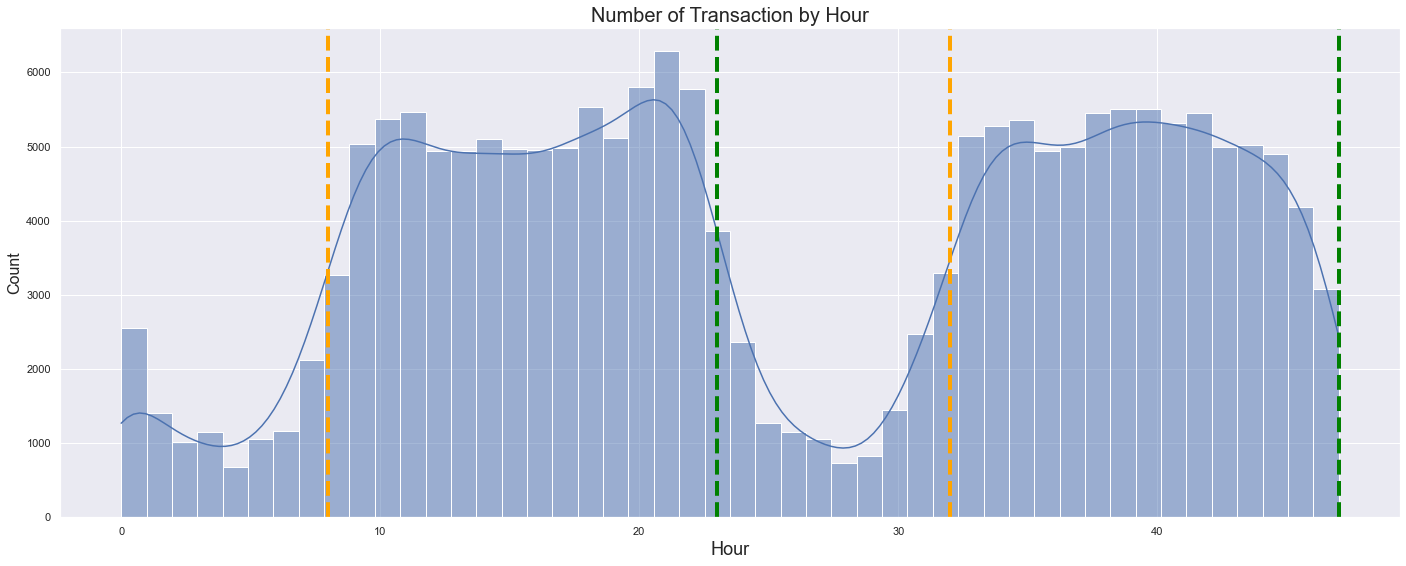

In [194]:
#histogram of number of trasnaction by time
plt.rcParams['figure.figsize'] = [24, 9]
sns.histplot(x='Hour', kde=True, data=X_train, bins = 48)
# Adding vertical lines
#first morning
plt.axvline(x = 8, linewidth = 4, color ='Orange', linestyle ="--")
#first night
plt.axvline(x = 8+15, linewidth = 4, color ='Green', linestyle ="--")
#Second morning
plt.axvline(x = 8+24, linewidth = 4, color ='Orange', linestyle ="--")
#second night
plt.axvline(x = 8+24+15, linewidth = 4, color ='Green', linestyle ="--")
plt.xlabel('Hour', fontsize=18)
plt.ylabel('Count', fontsize=16)
plt.title('Number of Transaction by Hour',fontsize=20)
plt.show();

From the above we see that the number of transaction at each hour has a bimodal graph.
One would expect the number of transactions would start to increas at a certain hour in the morning and then decrease at  night. However it seems that days are quite long at europe and to find the night time it is a bit more difficult.
Since the data is masked, it is more of a guess but my bet would be that the transactions are starting at 0:00 in te morning and they end at 24:00 in the second day.
I am going to add another feature for time of day and am going to loosley call it midnight. It probably would be more useful for data sets with more days, but we can see how it will help with fradulant behavior detection.

In [195]:
#midnight function
def midnight(x):
    if x < 8:
        return 1
    elif x < 24:
        return 0
    elif x < 24+8:
        return 1
    else:
        return 0

In [196]:
X_train['Midnight'] = X_train['Hour'].apply(midnight)
X_test['Midnight'] = X_test['Hour'].apply(midnight)
X_val['Midnight'] = X_val['Hour'].apply(midnight)

Now we take a look at number of fradulant activities by time of day.

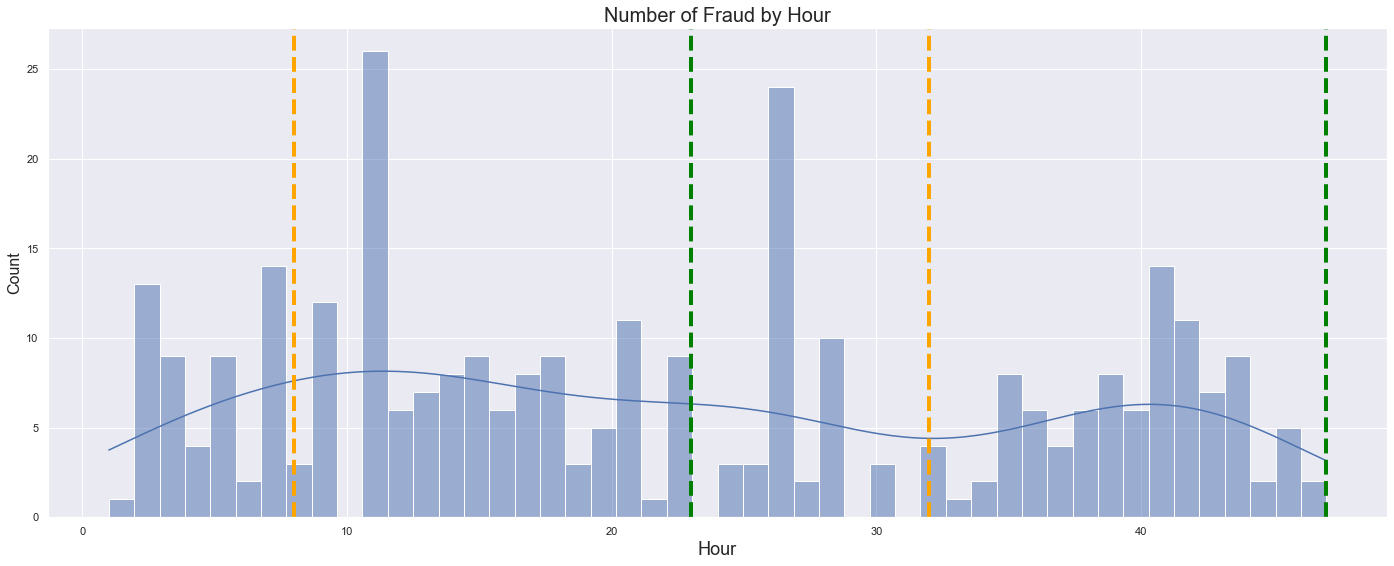

In [197]:
#histogram of number of trasnaction by time
plt.rcParams['figure.figsize'] = [24, 9]
sns.histplot(x='Hour', kde=True, data=X_train[y_train['Class']==1], bins = 48)
# Adding vertical lines
#first morning
plt.axvline(x = 8, linewidth = 4, color ='Orange', linestyle ="--")
#first night
plt.axvline(x = 8+15, linewidth = 4, color ='Green', linestyle ="--")
#Second morning
plt.axvline(x = 8+24, linewidth = 4, color ='Orange', linestyle ="--")
#second night
plt.axvline(x = 8+24+15, linewidth = 4, color ='Green', linestyle ="--")
plt.xlabel('Hour', fontsize=18)
plt.ylabel('Count', fontsize=16)
plt.title('Number of Fraud by Hour',fontsize=20)
plt.show();

We see two peaks in the number of frauds detected, however the time period is too short to try to assume any pattern.

In [26]:
temp = pd.merge(X_train,y_train, left_index=True, right_index=True)
temp = temp.groupby("Hour")['Class'].sum() / temp.groupby("Hour")['Time'].count()

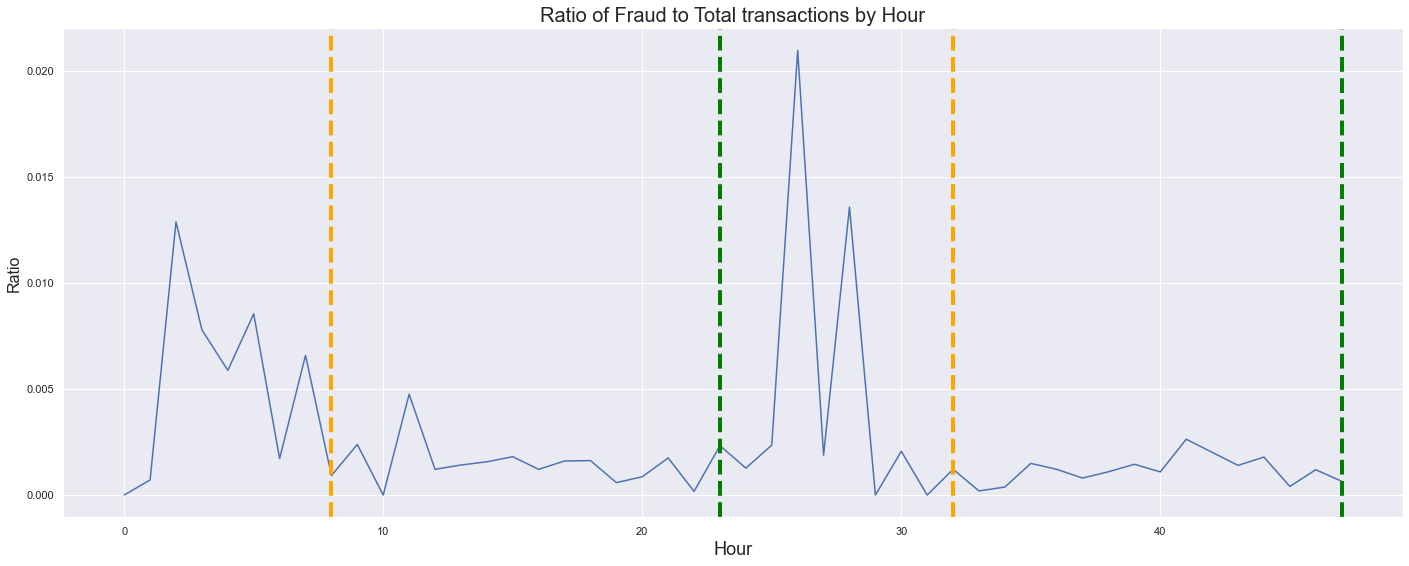

In [27]:
#histogram of number of trasnaction by time
plt.rcParams['figure.figsize'] = [24, 9]
#sns.histplot(x='Hour', kde=True, data=temp[temp['Class']<.5]['Class'], bins = 48)
temp.plot()
# Adding vertical lines
#first morning
plt.axvline(x = 8, linewidth = 4, color ='Orange', linestyle ="--")
#first night
plt.axvline(x = 8+15, linewidth = 4, color ='Green', linestyle ="--")
#Second morning
plt.axvline(x = 8+24, linewidth = 4, color ='Orange', linestyle ="--")
#second night
plt.axvline(x = 8+24+15, linewidth = 4, color ='Green', linestyle ="--")
plt.xlabel('Hour', fontsize=18)
plt.ylabel('Ratio', fontsize=16)
plt.title('Ratio of Fraud to Total transactions by Hour',fontsize=20)
plt.show();

## 3.2- Amount

As excpected transaction amount data is highly skewed.

In [28]:
print('Amount min is', X_train['Amount'].min())
print('Amount max is', X_train['Amount'].max())
print('Amount mean is', round(X_train['Amount'].mean(), 5))
print('Amount median is', round(X_train['Amount'].median(), 2))
print('About',  round(1 -X_train[X_train['Amount'] < X_train['Amount'].mean()]['Amount'].count() / X_train['Amount'].count(), 2),'% of transactions have a value above mean.')

Amount min is 0.0
Amount max is 19656.53
Amount mean is 87.97016
Amount median is 22.0
About 0.23 % of transactions have a value above mean.


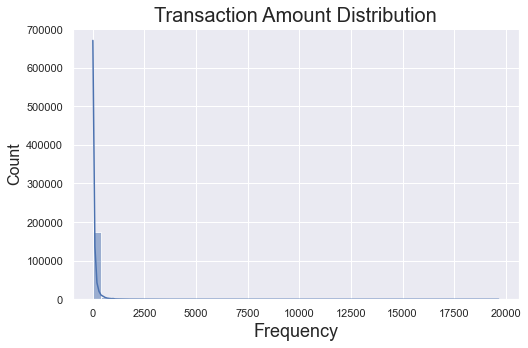

In [29]:
#histogram of number of trasnaction by time
plt.rcParams['figure.figsize'] = [8, 5]
sns.histplot(x='Amount', kde=True, data=X_train, bins = 50)
plt.xlabel('Frequency', fontsize=18)
plt.ylabel('Count', fontsize=16)
plt.title('Transaction Amount Distribution',fontsize=20)
plt.show();

As we can see the transaction amount is highly skewed, we limit the X axis.

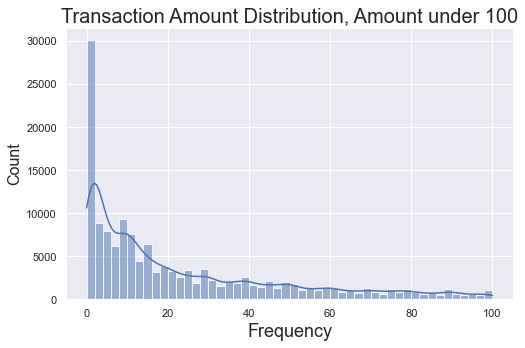

In [30]:
#histogram of number of trasnaction by time
plt.rcParams['figure.figsize'] = [8, 5]
sns.histplot(x='Amount', kde=True, data=X_train[X_train['Amount']<100], bins = 50)
plt.xlabel('Frequency', fontsize=18)
plt.ylabel('Count', fontsize=16)
plt.title('Transaction Amount Distribution, Amount under 100',fontsize=20)
plt.show();

Now we limit the value of transactions even more.

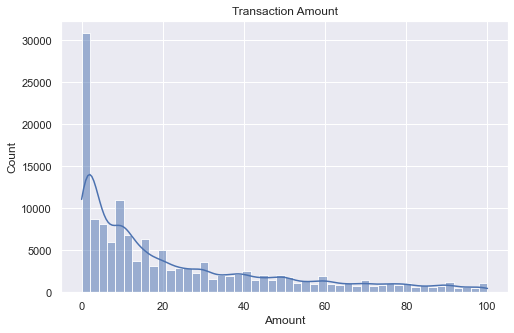

In [31]:
#histogram of number of trasnaction by time
plt.rcParams['figure.figsize'] = [8, 5]
sns.histplot(x='Amount', kde=True, data=X_train[X_train['Amount']<100], bins = 48)
plt.title('Transaction Amount');

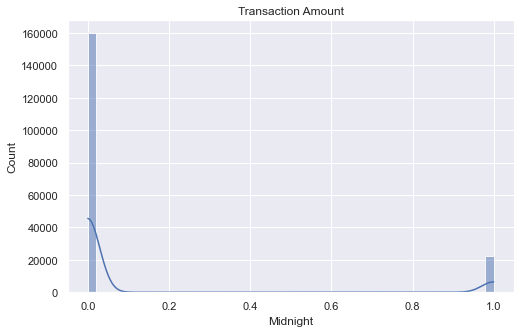

In [32]:
#histogram of number of trasnaction by time
plt.rcParams['figure.figsize'] = [8, 5]
sns.histplot(x=X_train.iloc[:,-1], kde=True, data=X_train[X_train.iloc[:,-1]<.0001], bins = 48)
plt.title('Transaction Amount');

In [33]:
X_train = pd.DataFrame(X_train)

In [34]:
data.columns[:-1]

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [35]:
Amount_cum = []
j = 30
t = 15
for i in range(30,t*j,j):
    Amount_cum.append(X_train[(X_train['Amount']>=i-j) &(X_train['Amount']<i)]['Amount'].sum())

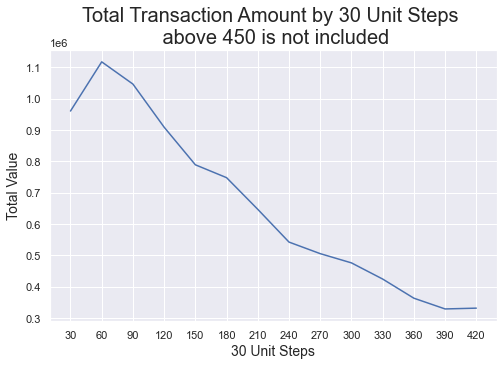

In [37]:
#histogram of number of trasnaction by time
plt.rcParams['figure.figsize'] = [8, 5]
sns.lineplot(x=range(1,t,1),  y=Amount_cum)
x_ticks_list = ["{:02d}".format(x) for x in range(30,t*j,j)]
#x_ticks_list.append('+450')
plt.xticks(np.arange(1,t,1),x_ticks_list)
plt.xlabel('30 Unit Steps', fontsize=14)
plt.ylabel('Total Value', fontsize=14)
plt.title('Total Transaction Amount by 30 Unit Steps \n above 450 is not included', fontsize=20);

The trimmed part of distribution looks like Khai Square. However, the majority of value is at the higher end, which is not depicted here, but the graph holds.

## 3.3 - Class 1 (Fraudulent)

Now we take a look at Fraudulent transactions amount.

In [38]:
X_train = pd.merge(X_train,y_train,right_index=True,left_index=True)

In [39]:
print('Amount min is', X_train[X_train['Class']==1]['Amount'].min())
print('Amount max is', X_train[X_train['Class']==1]['Amount'].max())
print('Amount mean is', round(X_train[X_train['Class']==1]['Amount'].mean(), 5))
print('Amount median is', round(X_train[X_train['Class']==1]['Amount'].median(), 2))
print('Ratio of number of frauelent transactions is %', round(X_train[X_train['Class']==1]['Class'].sum()/ X_train.shape[0]*100,5))

Amount min is 0.0
Amount max is 2125.87
Amount mean is 130.93581
Amount median is 8.3
Ratio of number of frauelent transactions is % 0.17281


The fraudulent transactions have values lower than legitimate transaction values.

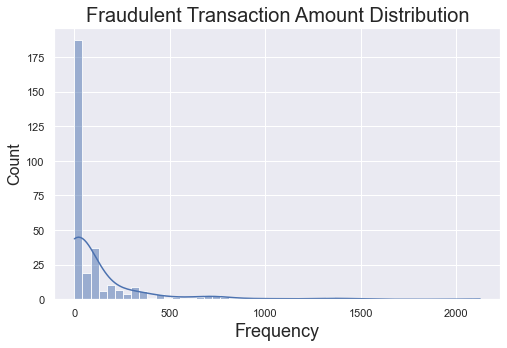

In [40]:
#histogram of number of trasnaction by time
plt.rcParams['figure.figsize'] = [8, 5]
sns.histplot(x='Amount', kde=True, data=X_train[X_train['Class']==1], bins = 50)
plt.xlabel('Frequency', fontsize=18)
plt.ylabel('Count', fontsize=16)
plt.title('Fraudulent Transaction Amount Distribution',fontsize=20)
plt.show();

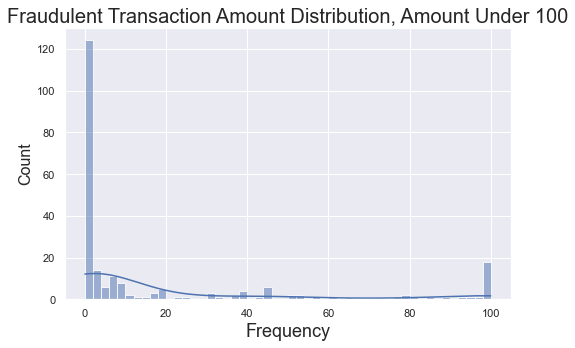

In [41]:
#histogram of number of trasnaction by time
plt.rcParams['figure.figsize'] = [8, 5]
sns.histplot(x='Amount', kde=True, data= X_train[(X_train['Class']==1)&(X_train['Amount']<100)], bins = 50)
plt.xlabel('Frequency', fontsize=18)
plt.ylabel('Count', fontsize=16)
plt.title('Fraudulent Transaction Amount Distribution, Amount Under 100',fontsize=20)
plt.show();

In [42]:
Amount_cum = []
j = 30
t = 15
for i in range(30,t*j,j):
    Amount_cum.append(X_train[(X_train['Class']==1)&(X_train['Amount']>=i-j) &(X_train['Amount']<i)]['Amount'].sum())

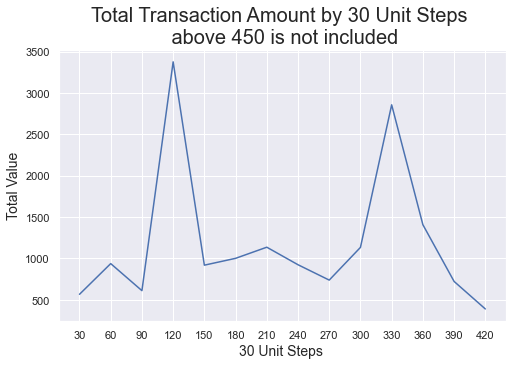

In [44]:
#histogram of number of trasnaction by time
plt.rcParams['figure.figsize'] = [8, 5]
sns.lineplot(x=range(1,t,1),  y=Amount_cum)
x_ticks_list = ["{:02d}".format(x) for x in range(30,t*j,j)]
#x_ticks_list.append('+450')
plt.xticks(np.arange(1,t,1),x_ticks_list)
plt.xlabel('30 Unit Steps ', fontsize=14)
plt.ylabel('Total Value', fontsize=14)
plt.title('Total Transaction Amount by 30 Unit Steps \n above 450 is not included', fontsize=20);

other variables

## 3.4 - Heatmap

Setting a 0.3 threshold we see that the data which has been transformed with PCA, does not have that many correlated columns.

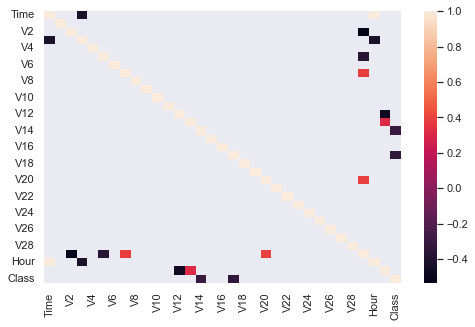

In [45]:
sns.heatmap(X_train.corr()[X_train.corr().abs()>.3]);

In [46]:
X_train = X_train.drop('Class',axis=1)

In [47]:
col_names = X_train.columns

In [48]:
dill.dump(X_train, open('X_train.p', "wb"))
dill.dump(X_test, open('X_test.p', "wb"))
dill.dump(y_train, open('y_train.p', "wb"))
dill.dump(y_test, open('y_test.p', "wb"))
dill.dump(col_names,open('col_names.p','wb'))

In [5]:
X_train = dill.load(open("X_train.p", "rb"))
X_test = dill.load(open("X_test.p", "rb"))
y_train = dill.load(open("y_train.p", "rb"))
y_test = dill.load(open("y_test.p", "rb"))
col_names = dill.load(open('col_names.p', "rb"))

# 4- Data Preprocessing

## 4.1- Feature Engineering

### autofeat library

The process should actually has been done after data scale transformation, however since I found that non transformed data has the best performance, i moved the auto feature engineering part to an earlier stage, in the hope that if succseful, I would use it as the prior for transformation methods.

Although it was not expected, but it seems that the imbalance lead to poor results and it would be better if we would use these methods after data balance. However, the processing demand makes it not that probable and I leave the code just to show that I tempered with the idea.

%%time
from autofeat import AutoFeatClassifier
auto_feat = AutoFeatClassifier(feateng_steps = 2 , n_jobs = -1)
train_eng = auto_feat.fit_transform(X_train.loc[:,['V17', 'V14', 'V10', 'V4', 'V7']] , y_train)

dill.dump(auto_feat, open('auto_feat.pkl', 'wb'))
dill.dump(train_eng, open('train_eng.pkl', 'wb'))

#### the main columns are removed s only new ones be attached
train_eng.set_index(X_train.index, inplace=True)
train_eng.drop(['V17', 'V14', 'V10', 'V4', 'V7'], axis=1, inplace=True)

test_eng= auto_feat.transform(X_test.loc[:,['V17', 'V14', 'V10', 'V4', 'V7']])
test_eng.set_index(X_test.index, inplace=True)
test_eng.drop(['V17', 'V14', 'V10', 'V4', 'V7'], axis=1, inplace=True)

val_eng= auto_feat.transform(X_val.loc[:,['V17', 'V14', 'V10', 'V4', 'V7']])
val_eng.set_index(X_val.index, inplace=True)
val_eng.drop(['V17', 'V14', 'V10', 'V4', 'V7'], axis=1, inplace=True)

dill.dump(train_eng, open("./train_eng.p", "wb"))
dill.dump(test_eng, open("./test_eng.p", "wb"))
dill.dump(val_eng, open("./val_eng.p", "wb"))

train_eng = dill.load(open("./train_eng.p", "rb"))
test_eng = dill.load(open("./test_eng.p", "rb"))
val_eng = dill.load(open("./val_eng.p", "rb"))

X_train_en = pd.concat([X_train, train_eng], axis=1)
X_test_en = pd.concat([X_test, test_eng], axis=1)
X_val_en = pd.concat([X_val, val_eng], axis=1)

dill.dump(X_train_en, open("./X_train_en.p", "wb"))
dill.dump(X_test_en, open("./X_test_en.p", "wb"))
dill.dump(X_val_en, open("./X_val_en.p", "wb"))

X_train_en = dill.load(open("./X_train_en.p", "rb"))
X_test_en = dill.load(open("./X_test_en.p", "rb"))
X_val_en = dill.load(open("./X_val_en.p", "rb"))

## 4.2- Data Transformation

As data normality is rejected strongly with statistical tests, I am going to use a variety of scaling techniques and use them as input for different predictive models. The Tree based methods are fairly robust to non normall input however even them would them benefit from outlier metigation procedures.

### Jarque–Bera test of normality
The values smaller than 0.05 will be considered a sign for null hypothesis rejection.

In [51]:
from scipy import stats
Jarque_Bera_pre= []
for i in range(X_train.shape[1]):
    Jarque_Bera_pre.append(stats.jarque_bera(X_train.iloc[:,i]).pvalue)
print(Jarque_Bera_pre)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [52]:
print('Transaction value mean any transformation:',X_train['Amount'].mean())
print('Transaction value any transformation:',X_train['Amount'].std())
print('Transaction value skewness any transformation:',X_train['Amount'].skew())

Transaction value mean any transformation: 87.97016354319821
Transaction value any transformation: 245.57689058205864
Transaction value skewness any transformation: 15.295298039308157


### Min Max Scaler
I just run the min max scaler which does not change the distribution of data.

In [53]:
from sklearn.preprocessing import MinMaxScaler
MinMax = MinMaxScaler()
MinMax.fit(X_train)
X_train_min_max= MinMax.transform(X_train)
X_test_min_max= MinMax.transform(X_test)
#X_val_min_max= MinMax.transform(X_val)
X_train_min_max= pd.DataFrame(X_train_min_max,columns=col_names)
X_test_min_max= pd.DataFrame(X_test_min_max,columns=col_names)

In [54]:
print('Transaction value mean after MinMax transformation:',X_train_min_max['Amount'].mean())
print('Transaction value after MinMax transformation:',X_train_min_max['Amount'].std())
print('Transaction value skewness after MinMax transformation:',X_train_min_max['Amount'].skew())

Transaction value mean after MinMax transformation: 0.004475365872979527
Transaction value after MinMax transformation: 0.012493399932849727
Transaction value skewness after MinMax transformation: 15.295298039308161


### Robust Scaler

In [55]:
from sklearn.preprocessing import RobustScaler
Robust = RobustScaler()
Robust.fit(X_train)
X_train_robust= Robust.transform(X_train)
X_test_robust= Robust.transform(X_test)
X_train_robust= pd.DataFrame(X_train_robust,columns=col_names)
X_test_robust= pd.DataFrame(X_test_robust,columns=col_names)

In [56]:
print('Transaction value mean after Robust transformation:',X_train_robust['Amount'].mean())
print('Transaction value after Robust transformation:',X_train_robust['Amount'].std())
print('Transaction value skewness after Robust transformation:',X_train_robust['Amount'].skew())

Transaction value mean after Robust transformation: 0.9189004916000726
Transaction value after Robust transformation: 3.4206482652374364
Transaction value skewness after Robust transformation: 15.295298039308152


### Power Transformation - Yeo Johnson

### Jarque–Bera test
Testing for non-normailty of data and then power transforming to address the issue.

In [57]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=False)
pt.fit(X_train)
X_train_power= pt.transform(X_train)
X_test_power= pt.transform(X_test)
X_train_power= pd.DataFrame(X_train_power,columns=col_names)
X_test_power= pd.DataFrame(X_test_power,columns=col_names)

In [58]:
from scipy import stats
Jarque_Bera_post= []
for i in range(X_train_power.shape[1]):
    Jarque_Bera_post.append(stats.jarque_bera(X_train_power.iloc[:,i]).pvalue)
print(Jarque_Bera_post)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [59]:
print('Transaction value mean before Yeo Johnson transformation:',X_train_power['Amount'].mean())
print('Transaction value SD Yeo Johnson transformation:',X_train_power['Amount'].std())
print('Transaction value skewness Yeo Johnson transformation:',X_train_power['Amount'].skew())

Transaction value mean before Yeo Johnson transformation: 2.892654611554365
Transaction value SD Yeo Johnson transformation: 1.438488875930354
Transaction value skewness Yeo Johnson transformation: 0.017954737112211967


Even after the transformation, although the data normality is rejected by the performed statistical tests, it is less skewed.

### Quantile Transformer - uniform

In [60]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(output_distribution='uniform')
qt.fit(X_train)
X_train_q_uni= qt.transform(X_train)
X_test_q_uni= qt.transform(X_test)
X_train_q_uni= pd.DataFrame(X_train_q_uni,columns=col_names)
X_test_q_uni= pd.DataFrame(X_test_q_uni,columns=col_names)

In [61]:
print('Transaction value mean after Quantile Transformer - uniform transformation:',X_test_q_uni['Amount'].mean())
print('Transaction value SD after Quantile Transformer - uniform:',X_test_q_uni['Amount'].std())
print('Transaction value skewness after Quantile Transformer - uniform:',X_test_q_uni['Amount'].skew())

Transaction value mean after Quantile Transformer - uniform transformation: 0.4987138121466453
Transaction value SD after Quantile Transformer - uniform: 0.28873863613676287
Transaction value skewness after Quantile Transformer - uniform: 0.007147371692289761


### Quantile Transformer - Gaussian

In [62]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(output_distribution='normal')
qt.fit(X_train)
X_train_q_gaus= qt.transform(X_train)
X_test_q_gaus= qt.transform(X_test)
X_train_q_gaus= pd.DataFrame(X_train_q_gaus,columns=col_names)
X_test_q_gaus= pd.DataFrame(X_test_q_gaus,columns=col_names)

In [63]:
print('Transaction value mean after Quantile Transformer - Gaussian transformation:',X_test_q_uni['Amount'].mean())
print('Transaction value SD after Quantile Transformer - Gaussian transformation:',X_test_q_uni['Amount'].std())
print('Transaction value skewness after Quantile Transformer - Gaussian transformation:',X_test_q_uni['Amount'].skew())

Transaction value mean after Quantile Transformer - Gaussian transformation: 0.4987138121466453
Transaction value SD after Quantile Transformer - Gaussian transformation: 0.28873863613676287
Transaction value skewness after Quantile Transformer - Gaussian transformation: 0.007147371692289761


## 4-4 Anomaly Detection
https://www.kaggle.com/code/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets

outlier detection:
The training data contains outliers which are defined as observations that are far from the others. Outlier detection estimators thus try to fit the regions where the training data is the most concentrated, ignoring the deviant observations.

### 4.4.1 - Isolation Forest

In [64]:
from sklearn.ensemble import IsolationForest
IsoForest = IsolationForest(random_state=42,contamination=.001)
IsoForest.fit(X_train)
IsoPred = IsoForest.predict(X_train)
X_train_Iso_001 = X_train[IsoPred == 1]
y_train_Iso_001 = y_train[IsoPred == 1]

C:\Users\axb190032\Desktop\Python-Virtual-Enviroment\Enviroment1\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [65]:
from sklearn.ensemble import IsolationForest
IsoForest = IsolationForest(random_state=42,contamination=.002)
IsoForest.fit(X_train)
IsoPred = IsoForest.predict(X_train)
X_train_Iso_002 = X_train[IsoPred == 1]
y_train_Iso_002 = y_train[IsoPred == 1]

C:\Users\axb190032\Desktop\Python-Virtual-Enviroment\Enviroment1\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [66]:
from sklearn.ensemble import IsolationForest
IsoForest = IsolationForest(random_state=42,contamination=.005)
IsoForest.fit(X_train)
IsoPred = IsoForest.predict(X_train)
X_train_Iso_005 = X_train[IsoPred == 1]
y_train_Iso_005 = y_train[IsoPred == 1]

C:\Users\axb190032\Desktop\Python-Virtual-Enviroment\Enviroment1\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [68]:
from sklearn.ensemble import IsolationForest
IsoForest = IsolationForest(random_state=42,contamination=.007)
IsoForest.fit(X_train)
IsoPred = IsoForest.predict(X_train)
X_train_Iso_007 = X_train[IsoPred == 1]
y_train_Iso_007 = y_train[IsoPred == 1]

C:\Users\axb190032\Desktop\Python-Virtual-Enviroment\Enviroment1\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [69]:
from sklearn.ensemble import IsolationForest
IsoForest = IsolationForest(random_state=42,contamination=.010)
IsoForest.fit(X_train)
IsoPred = IsoForest.predict(X_train)
X_train_Iso_010 = X_train[IsoPred == 1]
y_train_Iso_010 = y_train[IsoPred == 1]

C:\Users\axb190032\Desktop\Python-Virtual-Enviroment\Enviroment1\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


### 4.4.2 Mahalanobis Distance

In [ ]:
#!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu116

In [ ]:
#!pip install alibi-detect

In [70]:
from alibi_detect.od import Mahalanobis

od = Mahalanobis(threshold=.01)
preds = od.predict(np.array(X_train),  return_instance_score = True)

X_train_Mah_001 = X_train[preds["data"]["is_outlier"]==1]
y_train_Mah_001 = y_train[preds["data"]["is_outlier"]==1]

C:\Users\axb190032\Desktop\Python-Virtual-Enviroment\Enviroment1\lib\site-packages\alibi_detect\utils\pytorch\kernels.py:60: UserWarning: Failed to initialize NumPy: module compiled against API version 0x10 but this version of numpy is 0xf (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:68.)
  self.log_sigma = nn.Parameter(torch.empty(1), requires_grad=trainable)


In [71]:
from alibi_detect.od import Mahalanobis

od = Mahalanobis(threshold=.05)
preds = od.predict(np.array(X_train),  return_instance_score = True)

X_train_Mah_005 = X_train[preds["data"]["is_outlier"]==1]
y_train_Mah_005 = y_train[preds["data"]["is_outlier"]==1]

In [72]:
from alibi_detect.od import Mahalanobis

od = Mahalanobis(threshold=.1)
preds = od.predict(np.array(X_train),  return_instance_score = True)

X_train_Mah_01 = X_train[preds["data"]["is_outlier"]==1]
y_train_Mah_01 = y_train[preds["data"]["is_outlier"]==1]

In [73]:
from  alibi_detect.od import Mahalanobis

od = Mahalanobis(threshold=.5)
preds = od.predict(np.array(X_train),  return_instance_score = True)

X_train_Mah_05 = X_train[preds["data"]["is_outlier"]==1]
y_train_Mah_05 = y_train[preds["data"]["is_outlier"]==1]

In [74]:
from  alibi_detect.od import Mahalanobis

od = Mahalanobis(threshold=1)
preds = od.predict(np.array(X_train),  return_instance_score = True)

X_train_Mah_1 = X_train[preds["data"]["is_outlier"]==1]
y_train_Mah_1 = y_train[preds["data"]["is_outlier"]==1]

### saving all the data in a single dictionary

After trying some transformation, those that lead to drop in model performance are removed.

In [140]:
data_dict = {'default': {0: X_train, 1: y_train},
             #'min_max': {0: X_train_min_max, 1: y_train},
             #'robust': {0: X_train_robust, 1: y_train},
             #'power': {0: X_train_power, 1: y_train},
             #'q_uni': {0: X_train_q_uni, 1: y_train},
             #'q_gaus': {0: X_train_q_gaus, 1: y_train},
             'Iso_001': {0: X_train_Iso_001, 1: y_train_Iso_001},
             #'Iso_002': {0: X_train_Iso_002, 1: y_train_Iso_002},
             'Iso_005': {0: X_train_Iso_005, 1: y_train_Iso_005},
             #'Iso_007': {0: X_train_Iso_007, 1: y_train_Iso_007},
             'Iso_010': {0: X_train_Iso_010, 1: y_train_Iso_010},
              #'Mah_001': {0: X_train_Mah_001, 1: y_train_Mah_001},
              #'Mah_005': {0: X_train_Mah_005, 1: y_train_Mah_005},
              #'Mah_01': {0: X_train_Mah_01, 1: y_train_Mah_01},
              #'Mah_05': {0: X_train_Mah_05, 1: y_train_Mah_05},
              #'Mah_1': {0: X_train_Mah_1, 1: y_train_Mah_1}
             }

In [141]:
dill.dump(data_dict, open('data_dict.p', "wb"))

In [6]:
data_dict = dill.load(open("data_dict.p", "rb"))

## 4-3 Autoencoder
#https://www.kaggle.com/code/shivamb/semi-supervised-classification-using-autoencoders
https://www.kaggle.com/code/shivamb/how-autoencoders-work-intro-and-usecases/notebook

Autoencoders are a special type of neural network architectures in which the output is same as the input. Autoencoders are trained in an unsupervised manner in order to learn the exteremely low level repersentations of the input data. These low level features are then deformed back to project the actual data. An autoencoder is a regression task where the network is asked to predict its input (in other words, model the identity function). These networks has a tight bottleneck of a few neurons in the middle, forcing them to create effective representations that compress the input into a low-dimensional code that can be used by the decoder to reproduce the original input.

A typical autoencoder architecture comprises of three main components:

- Encoding Architecture : The encoder architecture comprises of series of layers with decreasing number of nodes and ultimately reduces to a latent view repersentation.
- Latent View Repersentation : Latent view repersents the lowest level space in which the inputs are reduced and information is preserved.
- Decoding Architecture : The decoding architecture is the mirro image of the encoding architecture but in which number of nodes in every layer increases and ultimately outputs the similar (almost) input.

Although the idea is very intresting, but getting a model that actually improves the performance in the tabular setting is very difficult compared to other methods so I am going to skip the use of this transformed data. And just leave the code for the refrence.

import tensorflow as tf
print("TensorFlow version:", tf.__version__)

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Model, regularizers, Sequential

### define the model
input_layer = Input(shape=(X_train_min_max.shape[1],))
encoded = Dense(100, activation='relu', activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoded = Dense(75, activation='relu')(encoded)
encoded = Dense(30, activation='relu')(encoded)
encoded = Dense(10, activation='sigmoid')(encoded)
decoded = Dense(30, activation='relu')(encoded)
decoded = Dense(70, activation='relu')(decoded)
decoded = Dense(100, activation='relu')(decoded)
output_layer = Dense(X_train_min_max.shape[1], activation='relu')(decoded)

autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer="adam", loss="mse")

autoencoder.summary()

autoencoder.fit(X_train_min_max, X_train_min_max,
                batch_size = 256, epochs = 30,
                shuffle = True, validation_split = 0.20);

hidden_representation = Sequential()
hidden_representation.add(autoencoder.layers[0])
hidden_representation.add(autoencoder.layers[1])
hidden_representation.add(autoencoder.layers[2])
hidden_representation.add(autoencoder.layers[3])
hidden_representation.add(autoencoder.layers[4])

X_train_auto = hidden_representation.predict(X_train_min_max)
X_test_auto = hidden_representation.predict(X_test_min_max)
X_val_auto = hidden_representation.predict(X_val_min_max)

pd.DataFrame(X_train_auto).shape , X_train.shape

## 4-6 Oversampling
##from imblearn.metrics import classification_report_imbalanced
SMOT is a good option if the fraud activities are close together, otherwise it leads to noise.
https://towardsdatascience.com/5-smote-techniques-for-oversampling-your-imbalance-data-b8155bdbe2b5

### 4.6.1 SMOTE - Synthetic Minority Oversampling Technique
the basic implementation of SMOTE will not make any distinction between easy and hard samples to be classified using the nearest neighbors rule.

In [146]:
from imblearn.over_sampling import SMOTE

In [147]:
from collections import defaultdict

data_dict_SMOTE = defaultdict(dict)

for key in data_dict:
    data_dict_SMOTE[key][0],data_dict_SMOTE[key][1] = SMOTE(random_state=42).fit_resample(data_dict[key][0],data_dict[key][1])

In [148]:
dill.dump(data_dict_SMOTE, open('data_dict_SMOTE.p', "wb"))

In [7]:
data_dict_SMOTE = dill.load(open("data_dict_SMOTE.p", "rb"))

### 4.6.2 ADASYN -  Adaptive Synthetic
ADASYN focuses on generating samples next to the original samples which are wrongly classified using a k-Nearest Neighbors classifier

In [150]:
from imblearn.over_sampling import ADASYN

In [151]:
from collections import defaultdict

data_dict_ADASYN = defaultdict(dict)

for key in data_dict:
    data_dict_ADASYN[key][0],data_dict_ADASYN[key][1] = ADASYN(random_state=42).fit_resample(data_dict[key][0],data_dict[key][1])

In [152]:
dill.dump(data_dict_ADASYN, open('data_dict_ADASYN.p', "wb"))

In [8]:
data_dict_ADASYN = dill.load(open("data_dict_ADASYN.p", "rb"))

### 4.6.3 BorderlineSMOTE - Borderline Synthetic Minority Oversampling

In [154]:
from imblearn.over_sampling import BorderlineSMOTE

In [155]:
from collections import defaultdict

data_dict_BorderlineSMOTE = defaultdict(dict)

for key in data_dict:
    data_dict_BorderlineSMOTE[key][0],data_dict_BorderlineSMOTE[key][1] = BorderlineSMOTE(random_state=42).fit_resample(data_dict[key][0],data_dict[key][1])

In [156]:
dill.dump(data_dict_BorderlineSMOTE, open('data_dict_BorderlineSMOTE.p', "wb"))

In [9]:
data_dict_BorderlineSMOTE = dill.load(open("data_dict_BorderlineSMOTE.p", "rb"))

## 4.7- Hybrid Over and Undersampling

### 4.7.1 SMOTEENN

Over-sampling using SMOTE and cleaning using ENN.

In [158]:
from imblearn.combine import SMOTEENN

In [159]:
from collections import defaultdict

data_dict_SMOTEENN = defaultdict(dict)

for key in data_dict:
    data_dict_SMOTEENN[key][0],data_dict_SMOTEENN[key][1] = SMOTEENN(random_state=42).fit_resample(data_dict[key][0],data_dict[key][1])

In [160]:
dill.dump(data_dict_SMOTEENN, open('data_dict_SMOTEENN.p', "wb"))

In [10]:
data_dict_SMOTEENN = dill.load(open("data_dict_SMOTEENN.p", "rb"))

### 4.7.2 SMOTETomek - SMOTE and ENN

Over-sampling using SMOTE and cleaning using Tomek links.

In [13]:
from imblearn.combine import SMOTETomek

In [14]:
from collections import defaultdict

data_dict_SMOTETomek = defaultdict(dict)

for key in data_dict:
    data_dict_SMOTETomek[key][0],data_dict_SMOTETomek[key][1] = SMOTETomek(random_state=42).fit_resample(data_dict[key][0],data_dict[key][1])

In [15]:
dill.dump(data_dict_SMOTETomek, open('data_dict_SMOTETomek.p', "wb"))

In [ ]:
data_dict_SMOTETomek = dill.load(open("data_dict_SMOTETomek.p", "rb"))

Saving all over and hybrid sampling dictionaries in a single dictionary. The only method that on average leads to a reduction in performance is BorderlineSMOTE, so I will comment it out.

In [16]:
data_dict_sampled= {'notSampled': data_dict,
                    'SMOTE': data_dict_SMOTE,
                    'ADASYN': data_dict_ADASYN,
                    #'BorderlineSMOTE': data_dict_BorderlineSMOTE,
                    'SMOTEENN': data_dict_SMOTEENN,
                    'SMOTETomek': data_dict_SMOTETomek
                    }

In [17]:
dill.dump(data_dict_sampled, open('data_dict_sampled.p', "wb"))

In [ ]:
data_dict_sampled = dill.load(open("data_dict_sampled.p", "rb"))

# 5- Modeling

## 5-1.XGBoost

I am going

In [18]:
# funcion showing summary score for auc and average percision
def summary_score(y_test, predictions):
    print('The AUC score is:',roc_auc_score(y_test, predictions))
    print('The Average Precision score is:',average_precision_score(y_test, predictions))
    #print('The f1 score is:',f1_score(y_test, predictions))
    #print('The balanced accuracy score is:',balanced_accuracy_score(y_test, predictions))

In [19]:
# function for plotting AUC and AvgPrecision
def plot_performance(y_test, predictions):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,6))
    fig.suptitle('Model Performance')

    from sklearn.metrics import roc_curve
    y_pred_proba = predictions
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    #create ROC curve
    ax1.plot(fpr, tpr)
    ax1.set_ylabel('True Positive Rate')
    ax1.set_xlabel('False Positive Rate')

    from sklearn.metrics import precision_recall_curve
    precision, recall, _ = precision_recall_curve(y_test, predictions)
    ax2.plot(precision, recall,'Orange')
    #create ROC curve
    ax2.set_ylabel('Precision')
    ax2.set_xlabel('Recall')

In [212]:
# calibration curve
def calib_curve(y_test,predictions):
    from sklearn.calibration import calibration_curve

    plt.rcParams['figure.figsize'] = [6, 6]
    # Creating Calibration Curve
    x, y = calibration_curve(y_test, predictions, n_bins = 20)

    # Plot calibration curve

    # Plot perfectly calibrated
    plt.plot([0, 1], [0, 1], linestyle = '--', label = 'Ideally Calibrated')

    # Plot model's calibration curve
    plt.plot(y, x, marker = '.', label = 'Classifier')

    sns.rugplot(predictions, height=0.025,  color='k')

    leg = plt.legend(loc = 'upper left')
    plt.xlabel('Average Predicted Probability in each bin')
    plt.ylabel('Ratio of positives')
    plt.show()

### 5.1.1. XGBoost - Default

In [21]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, average_precision_score

In [114]:
%%capture
xgb_1 = XGBClassifier()
xgb_1.fit(X_train, y_train)
predictions = xgb_1.predict_proba(X_test)[:,1]

In [122]:
summary_score(y_test, predictions)

The AUC score is: 0.9782144005604492
The Average Precision score is: 0.8718013792999797


In [ ]:
plot_performance(y_test, predictions)

In [22]:
from collections import defaultdict

xgb_def_dict = defaultdict(dict)
xgb_def_scores = defaultdict(dict)
i = 1

for data_set in data_dict_sampled:
    for key in data_dict_sampled[data_set]:
        tic = time()
        xgb = XGBClassifier()
        xgb.fit(data_dict_sampled[data_set][key][0], data_dict_sampled[data_set][key][1])
        predictions = xgb.predict_proba(X_test)[:, 1]
        xgb_def_dict[data_set][key] = xgb
        xgb_def_scores[data_set][key] = [roc_auc_score(y_test, predictions), average_precision_score(y_test, predictions)]
        summary_score(y_test, predictions)
        print(f"model",i , 'sampling' , f"{data_set}" , 'transforming' f"{key}",f"fitted in {time() - tic:.3f}s")
        i += 1

xgb_def_scores = pd.concat({k: pd.DataFrame.from_dict(v, 'index') for k, v in xgb_def_scores.items()}, axis=0)
xgb_def_scores.rename(columns={0: 'AUC', 1: 'AvgPrecision', 2: 'det_curve', 3:'perc_recall'}, inplace=True)
xgb_def_scores.index.names = ['Sampling', 'Transformation']

The AUC score is: 0.9782144005604492
The Average Precision score is: 0.8718013792999797
model 1 sampling notSampled transformingdefault fitted in 14.824s
The AUC score is: 0.9688018602207342
The Average Precision score is: 0.8642438293439324
model 2 sampling notSampled transformingIso_001 fitted in 15.168s
The AUC score is: 0.978645432568075
The Average Precision score is: 0.8054054544295703
model 3 sampling notSampled transformingIso_005 fitted in 14.762s
The AUC score is: 0.9801549418304182
The Average Precision score is: 0.8430252068737687
model 4 sampling notSampled transformingIso_010 fitted in 14.200s
The AUC score is: 0.9826937598337028
The Average Precision score is: 0.8717382525383007
model 5 sampling SMOTE transformingdefault fitted in 39.366s
The AUC score is: 0.9776145088029584
The Average Precision score is: 0.8708396169651744
model 6 sampling SMOTE transformingIso_001 fitted in 39.834s
The AUC score is: 0.9845371304824688
The Average Precision score is: 0.8086419660425381

In [23]:
dill.dump(xgb_def_dict, open('xgb_dict.p', "wb"))
dill.dump(xgb_def_scores, open('xgb_def_scores.p', "wb"))

In [ ]:
xgb_def_dict = dill.load(open("xgb_dict.p", "rb"))
xgb_def_scores = dill.load(open("xgb_def_scores.p", "rb"))

In [24]:
xgb_def_scores.groupby('Transformation').agg(['mean','std'])

AUC           AvgPrecision          
                    mean       std         mean       std
Transformation                                           
default         0.981119  0.002441     0.870946  0.002196
Iso_001         0.977251  0.005118     0.865267  0.004106
Iso_005         0.982754  0.002362     0.809052  0.021465
Iso_010         0.981526  0.002179     0.813809  0.018561

In [25]:
xgb_def_scores.groupby('Sampling').agg(['mean','std'])

AUC           AvgPrecision          
                mean       std         mean       std
Sampling                                             
notSampled  0.976454  0.005169     0.846119  0.029750
SMOTE       0.980907  0.003252     0.837930  0.038664
ADASYN      0.982406  0.002204     0.838124  0.036226
SMOTEENN    0.981758  0.002448     0.828187  0.044786
SMOTETomek  0.981789  0.002395     0.848484  0.021488

In [26]:
xgb_def_scores['AUC'].mean()

0.9806626650554708

### 5.1.2 XGBoost- scale_pos_weight

In [27]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

scale_pos_weight = total_negative_examples / total_positive_examples

In [38]:
from collections import defaultdict

xgb_spw_dict = defaultdict(dict)
xgb_spw_scores = defaultdict(dict)
i = 1

for data_set in data_dict_sampled:
    for key in data_dict_sampled[data_set]:
        tic = time()
        spw = np.sum(data_dict_sampled[data_set][key][1]['Class']==0) / np.sum(data_dict_sampled[data_set][key][1]['Class']==1)
        xgb = XGBClassifier(scale_pos_weight= spw)
        xgb.fit(data_dict_sampled[data_set][key][0], data_dict_sampled[data_set][key][1])
        predictions = xgb.predict_proba(X_test)[:, 1]
        xgb_spw_dict[data_set][key] = xgb
        xgb_spw_scores[data_set][key] = [roc_auc_score(y_test, predictions), average_precision_score(y_test, predictions)]
        summary_score(y_test, predictions)
        print(f"model",i , 'sampling' , f"{data_set}" , 'transforming' f"{key}",f"fitted in {time() - tic:.3f}s")
        i += 1

xgb_spw_scores = pd.concat({k: pd.DataFrame.from_dict(v, 'index') for k, v in xgb_spw_scores.items()}, axis=0)
xgb_spw_scores.rename(columns={0: 'AUC', 1: 'AvgPrecision', 2: 'det_curve', 3:'perc_recall'}, inplace=True)
xgb_spw_scores.index.names = ['Sampling', 'Transformation']

The AUC score is: 0.9722808017410679
The Average Precision score is: 0.8725314995962937
model 1 sampling notSampled transformingdefault fitted in 20.984s
The AUC score is: 0.979056635667773
The Average Precision score is: 0.865528542374344
model 2 sampling notSampled transformingIso_001 fitted in 18.754s
The AUC score is: 0.9790094410724335
The Average Precision score is: 0.810606325168496
model 3 sampling notSampled transformingIso_005 fitted in 18.268s
The AUC score is: 0.9815528349775475
The Average Precision score is: 0.8301636078799205
model 4 sampling notSampled transformingIso_010 fitted in 17.458s
The AUC score is: 0.9826937598337028
The Average Precision score is: 0.8717382525383007
model 5 sampling SMOTE transformingdefault fitted in 39.501s
The AUC score is: 0.9776145088029584
The Average Precision score is: 0.8708396169651744
model 6 sampling SMOTE transformingIso_001 fitted in 39.607s
The AUC score is: 0.9845371304824688
The Average Precision score is: 0.8086419660425381
m

In [39]:
dill.dump(xgb_spw_dict, open('xgb_spw_dict.p', "wb"))
dill.dump(xgb_spw_scores, open('xgb_spw_scores.p', "wb"))

In [40]:
xgb_spw_dict = dill.load(open("xgb_spw_dict.p", "rb"))
xgb_spw_scores = dill.load(open("xgb_spw_scores.p", "rb"))

In [41]:
xgb_spw_scores.groupby('Transformation').agg(['mean','std'])

AUC           AvgPrecision          
                    mean       std         mean       std
Transformation                                           
default         0.980766  0.004941     0.870711  0.002593
Iso_001         0.979924  0.002502     0.865561  0.003213
Iso_005         0.981659  0.002820     0.802540  0.047974
Iso_010         0.981096  0.003729     0.813570  0.012827

In [42]:
xgb_spw_scores.groupby('Sampling').agg(['mean','std'])

AUC           AvgPrecision          
                mean       std         mean       std
Sampling                                             
notSampled  0.977975  0.003978     0.844707  0.029338
SMOTE       0.980907  0.003252     0.837930  0.038664
ADASYN      0.982523  0.003071     0.845417  0.026978
SMOTEENN    0.981112  0.003884     0.813939  0.069667
SMOTETomek  0.981789  0.002395     0.848484  0.021488

## 5.2. LightGBM

In [43]:
from lightgbm import LGBMClassifier

In [47]:
%%capture
from collections import defaultdict

lgb_def_dict = defaultdict(dict)
lgb_def_scores = defaultdict(dict)
i = 1

for data_set in data_dict_sampled:
    for key in data_dict_sampled[data_set]:
        tic = time()
        lgb = LGBMClassifier()
        lgb.fit(data_dict_sampled[data_set][key][0], data_dict_sampled[data_set][key][1])
        predictions = lgb.predict_proba(X_test)[:, 1]
        lgb_def_dict[data_set][key] = lgb
        lgb_def_scores[data_set][key] = [roc_auc_score(y_test, predictions), average_precision_score(y_test, predictions)]
        summary_score(y_test, predictions)
        print(f"model",i , 'sampling' , f"{data_set}" , 'transforming' f"{key}",f"fitted in {time() - tic:.3f}s")
        i += 1

lgb_def_scores = pd.concat({k: pd.DataFrame.from_dict(v, 'index') for k, v in lgb_def_scores.items()}, axis=0)
lgb_def_scores.rename(columns={0: 'AUC', 1: 'AvgPrecision', 2: 'det_curve', 3:'perc_recall'}, inplace=True)
lgb_def_scores.index.names = ['Sampling', 'Transformation']

In [48]:
dill.dump(lgb_def_dict, open('lgb_dict.p', "wb"))
dill.dump(lgb_def_scores, open('lgb_def_scores.p', "wb"))

In [49]:
lgb_def_dict = dill.load(open("lgb_dict.p", "rb"))
lgb_def_scores = dill.load(open("lgb_def_scores.p", "rb"))

In [50]:
lgb_def_scores.groupby('Transformation').agg(['mean','std'])

AUC           AvgPrecision          
                    mean       std         mean       std
Transformation                                           
default         0.910702  0.104579     0.658305  0.255178
Iso_001         0.901932  0.069598     0.643263  0.196842
Iso_005         0.911831  0.118957     0.586090  0.257410
Iso_010         0.919217  0.112565     0.602693  0.217438

In [51]:
lgb_def_scores.groupby('Sampling').agg(['mean','std'])

AUC           AvgPrecision          
                mean       std         mean       std
Sampling                                             
notSampled  0.739199  0.050779     0.216832  0.069856
SMOTE       0.935225  0.038849     0.726084  0.029969
ADASYN      0.947669  0.051951     0.739616  0.055180
SMOTEENN    0.968749  0.005428     0.732084  0.047385
SMOTETomek  0.963759  0.012274     0.698324  0.093946

In [52]:
lgb_def_scores['AUC'].mean()

0.910920501870557

## 5.3. Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
%%capture
from collections import defaultdict

logit_dict = defaultdict(dict)
logit_dict_scores = defaultdict(dict)
i = 1

for data_set in data_dict_sampled:
    for key in data_dict_sampled[data_set]:
        tic = time()
        log = LogisticRegression()
        log.fit(data_dict_sampled[data_set][key][0], data_dict_sampled[data_set][key][1])
        predictions = log.predict_proba(X_test)[:, 1]
        logit_dict[data_set][key] = log
        logit_dict_scores[data_set][key] = [roc_auc_score(y_test, predictions),
                                         average_precision_score(y_test, predictions)]
        summary_score(y_test, predictions)
        print(f"model", i, 'sampling', f"{data_set}", 'transforming' f"{key}", f"fitted in {time() - tic:.3f}s")
        i += 1

logit_dict_scores = pd.concat({k: pd.DataFrame.from_dict(v, 'index') for k, v in logit_dict_scores.items()}, axis=0)
logit_dict_scores.rename(columns={0: 'AUC', 1: 'AvgPrecision'}, inplace=True)
logit_dict_scores.index.names = ['Sampling', 'Transformation']

In [55]:
dill.dump(logit_dict, open('logit_dict.p', "wb"))
dill.dump(logit_dict_scores, open('logit_dict_scores.p', "wb"))

In [ ]:
logit_dict = dill.load(open("logit_dict.p", "rb"))
logit_dict_scores = dill.load(open("logit_dict_scores.p", "rb"))

In [56]:
logit_dict_scores.groupby('Transformation').mean()

,AUC,AvgPrecision
Transformation,,
default,0.965000,0.680191
Iso_001,0.965440,0.698219
Iso_005,0.968239,0.697384
Iso_010,0.968209,0.688394


In [57]:
logit_dict_scores.groupby('Sampling').mean()

,AUC,AvgPrecision
Sampling,,
notSampled,0.941606,0.670972
SMOTE,0.972798,0.693465
ADASYN,0.972519,0.688944
SMOTEENN,0.973844,0.700478
SMOTETomek,0.972843,0.701376


In [58]:
logit_dict_scores['AUC'].mean()

0.9667218526408874

## 5.n. Stacking

### 5.n.1. Stacking the XGboosts

In [153]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [154]:
level_0 = []

for i in xgb_def_dict:
    for j in xgb_def_dict[i]:
        level_0.append((i+'_'+j, xgb_def_dict[i][j]))

level_1 = LogisticRegression()

stc_xgb = StackingClassifier(estimators=level_0,
                               final_estimator=level_1,
                               cv=5,
                               n_jobs=-1)

In [155]:
%%capture
stc_xgb.fit(X_train, y_train)

In [213]:
predictions = stc_xgb.predict_proba(X_test)[:,1]

In [157]:
summary_score(y_test, predictions)

The AUC score is: 0.9782144005604492
The Average Precision score is: 0.8718013792999797


In [158]:
dill.dump(stc_xgb, open('stc_xgb.p', "wb"))

In [ ]:
stc_xgb = dill.load(open("stc_xgb.p", "rb"))

### Calibrating the XGboosts

https://towardsdatascience.com/calibrating-classifiers-559abc30711a

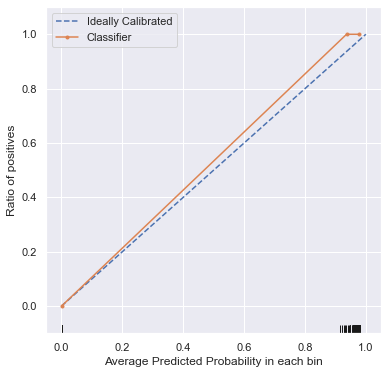

In [215]:
calib_curve(y_train, stc_xgb.predict_proba(X_train)[:,1])

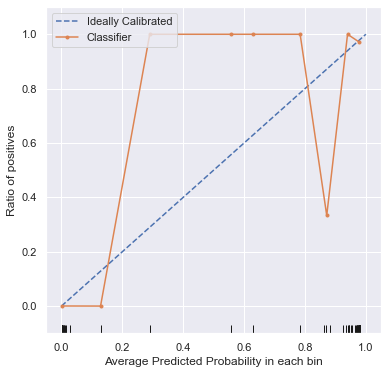

In [216]:
calib_curve(y_test, stc_xgb.predict_proba(X_test)[:,1])

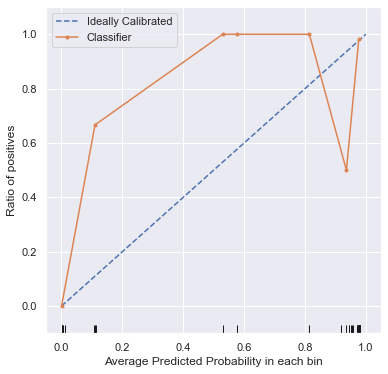

In [217]:
calib_curve(y_val, stc_xgb.predict_proba(X_val)[:,1])

### 5.n.2. Stacking the XGboosts Scale positive weights

In [153]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [172]:
level_0 = []

for i in xgb_spw_dict:
    for j in xgb_spw_dict[i]:
        level_0.append((i+'_'+j, xgb_spw_dict[i][j]))

level_1 = LogisticRegression()

stc_xgb_spw = StackingClassifier(estimators=level_0,
                               final_estimator=level_1,
                               cv=5,
                               n_jobs=-1)

In [173]:
%%capture
stc_xgb_spw.fit(X_train, y_train)

In [174]:
predictions = stc_xgb_spw.predict_proba(X_test)[:,1]

In [175]:
summary_score(y_test, predictions)

The AUC score is: 0.978683295912625
The Average Precision score is: 0.8879461778763236


In [176]:
dill.dump(stc_xgb_spw, open('stc_xgb_spw.p', "wb"))

In [ ]:
stc_xgb = dill.load(open("stc_xgb_spw.p", "rb"))

### 5.n.2. Stacking the LightGBMs

In [159]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [160]:
level_0 = []

for i in lgb_def_dict:
    for j in lgb_def_dict[i]:
        level_0.append((i+'_'+j, lgb_def_dict[i][j]))

level_1 = LogisticRegression()

stc_lgb = StackingClassifier(estimators=level_0,
                               final_estimator=level_1,
                               cv=5,
                               n_jobs=-1)

In [161]:
%%capture
stc_lgb.fit(X_train, y_train)

In [162]:
predictions = stc_lgb.predict_proba(X_test)[:,1]

In [163]:
summary_score(y_test, predictions)

The AUC score is: 0.7611573047902335
The Average Precision score is: 0.20758563995128002


In [164]:
dill.dump(stc_lgb, open('stc_lgb.p', "wb"))

In [ ]:
stc_lgb = dill.load(open("stc_lgb.p", "rb"))

### 5.n.3. Stacking the Logistic Regressions

In [165]:
level_0 = []

for i in logit_dict:
    for j in logit_dict[i]:
        level_0.append((i+'_'+j, logit_dict[i][j]))

level_1 = LogisticRegression()

stc_log = StackingClassifier(estimators=level_0,
                               final_estimator=level_1,
                               cv=5,
                               n_jobs=-1)

In [166]:
%%capture
stc_log.fit(X_train, y_train)

In [167]:
predictions = stc_log.predict_proba(X_test)[:,1]

In [168]:
summary_score(y_test, predictions)

The AUC score is: 0.9488092965098252
The Average Precision score is: 0.656643168778582


In [169]:
dill.dump(stc_log, open('stc_log.p', "wb"))

In [ ]:
stc_log = dill.load(open("stc_log.p", "rb"))

### 5.n.4. Stacking all three models

In [179]:
level_0 = []

for i in xgb_def_dict:
    for j in xgb_def_dict[i]:
        level_0.append((i+'_'+j+'xgb', xgb_def_dict[i][j]))

for i in xgb_spw_dict:
    for j in xgb_spw_dict[i]:
        level_0.append((i+'_'+j+'spw', xgb_spw_dict[i][j]))

for i in logit_dict:
    for j in logit_dict[i]:
        level_0.append((i+'_'+j+'log', logit_dict[i][j]))

for i in lgb_def_dict:
    for j in lgb_def_dict[i]:
        level_0.append((i+'_'+j+'lgb', lgb_def_dict[i][j]))

level_1 = LogisticRegression()

stc_all = StackingClassifier(estimators=level_0,
                               final_estimator=level_1,
                               cv=5)

In [180]:
%%capture
stc_all.fit(X_train, y_train)

In [181]:
predictions = stc_all.predict_proba(X_test)[:,1]

In [182]:
summary_score(y_test, predictions)

The AUC score is: 0.9737436547494631
The Average Precision score is: 0.8666635917195962


In [183]:
dill.dump(stc_all, open('stc_all.p', "wb"))

In [ ]:
stc_class.fit(X_train, y_train)

In [ ]:
predictions = stc_class.predict_proba(X_test)[:,1]

In [ ]:
summary_score(y_test, predictions)

In [ ]:
# funcion showing summary score for auc and average percision
def summary_score(y_test, predictions):
    print('The AUC score is:',roc_auc_score(y_test, predictions))
    print('The Average Precision score is:',average_precision_score(y_test, predictions))

In [ ]:
# function for plotting AUC and AvgPrecision
def plot_performance(y_test, predictions):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,6))
    fig.suptitle('Model Performance')

    from sklearn.metrics import roc_curve
    y_pred_proba = predictions
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    #create ROC curve
    ax1.plot(fpr, tpr)
    ax1.set_ylabel('True Positive Rate')
    ax1.set_xlabel('False Positive Rate')

    from sklearn.metrics import precision_recall_curve
    precision, recall, _ = precision_recall_curve(y_test, predictions)
    ax2.plot(precision, recall,'Orange')
    #create ROC curve
    ax2.set_ylabel('Precision')
    ax2.set_xlabel('Recall')

In [ ]:
# calibration curve
def calib_curve(y_test,predictions):
    from sklearn.calibration import calibration_curve

    plt.rcParams['figure.figsize'] = [6, 6]
    # Creating Calibration Curve
    x, y = calibration_curve(y_test, predictions, n_bins = 20)

    # Plot calibration curve

    # Plot perfectly calibrated
    plt.plot([0, 1], [0, 1], linestyle = '--', label = 'Ideally Calibrated')

    # Plot model's calibration curve
    plt.plot(y, x, marker = '.', label = 'Classifier')

    sns.rugplot(predictions, height=0.025,  color='k')

    leg = plt.legend(loc = 'upper left')
    plt.xlabel('Average Predicted Probability in each bin')
    plt.ylabel('Ratio of positives')
    plt.show()

# Validation results

Since during model tunning steps, I was using X_test and y_test to tune the steps, I use a final validation set which has not been used before at all to have a metric of the performance on an unseen data, and not the one that I was indirectly finetunning towards. It turns out that the stack of default XGBoost model has the best performance.

#### 1 - winner - XGB Default stack

In [202]:
predictions = stc_xgb.predict_proba(X_val)[:,1]

In [203]:
summary_score(y_val, predictions)

The AUC score is: 0.9705446460621475
The Average Precision score is: 0.8328709518293751


#### 2 - second place - XGB with scale positive rate stack

In [204]:
predictions = stc_xgb_spw.predict_proba(X_val)[:,1]

In [205]:
summary_score(y_val, predictions)

The AUC score is: 0.9700476666175067
The Average Precision score is: 0.8457526727134628


#### 3 - third place - All trained models stack

In [210]:
predictions = stc_all.predict_proba(X_val)[:,1]

In [211]:
summary_score(y_val, predictions)

The AUC score is: 0.9608001202100336
The Average Precision score is: 0.8169803568451239


#### 4 - fourth place - Logistic Regression stack

In [208]:
predictions = stc_log.predict_proba(X_val)[:,1]

In [209]:
summary_score(y_val, predictions)

The AUC score is: 0.9093955828377915
The Average Precision score is: 0.557951100927007


#### 5 - last place - LightGBM Default stack

In [206]:
predictions = stc_lgb.predict_proba(X_val)[:,1]

In [207]:
summary_score(y_val, predictions)

The AUC score is: 0.778227653316489
The Average Precision score is: 0.22738635691377912
